In [1]:
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()

In [2]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

# dataset info

In [3]:
bc.target[500]

np.int64(1)

In [4]:
bc.target.shape 

(569,)

In [5]:
bc.data[500]

array([1.504e+01, 1.674e+01, 9.873e+01, 6.894e+02, 9.883e-02, 1.364e-01,
       7.721e-02, 6.142e-02, 1.668e-01, 6.869e-02, 3.720e-01, 8.423e-01,
       2.304e+00, 3.484e+01, 4.123e-03, 1.819e-02, 1.996e-02, 1.004e-02,
       1.055e-02, 3.237e-03, 1.676e+01, 2.043e+01, 1.097e+02, 8.569e+02,
       1.135e-01, 2.176e-01, 1.856e-01, 1.018e-01, 2.177e-01, 8.549e-02])

In [6]:
bc.data.shape

(569, 30)

# Preprocessing

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.2)

In [8]:
print(f"Feature=> train: {x_train.shape} - test: {x_test.shape}")
print(f"Label=> train: {y_train.shape} - test: {y_test.shape}")

Feature=> train: (455, 30) - test: (114, 30)
Label=> train: (455,) - test: (114,)


In [9]:
x_train[0]

array([1.185e+01, 1.746e+01, 7.554e+01, 4.327e+02, 8.372e-02, 5.642e-02,
       2.688e-02, 2.280e-02, 1.875e-01, 5.715e-02, 2.070e-01, 1.238e+00,
       1.234e+00, 1.388e+01, 7.595e-03, 1.500e-02, 1.412e-02, 8.578e-03,
       1.792e-02, 1.784e-03, 1.306e+01, 2.575e+01, 8.435e+01, 5.178e+02,
       1.369e-01, 1.758e-01, 1.316e-01, 9.140e-02, 3.101e-01, 7.007e-02])

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [11]:
x_train[0]

array([0.23822105, 0.26208996, 0.22185731, 0.12267232, 0.28067166,
       0.11361266, 0.06298032, 0.11332008, 0.41161616, 0.14093817,
       0.03921166, 0.19399752, 0.02665847, 0.01322007, 0.19995241,
       0.09574308, 0.09198697, 0.21843647, 0.12074455, 0.04048222,
       0.18249733, 0.36593817, 0.16903232, 0.081744  , 0.43406194,
       0.16308848, 0.11247863, 0.31484671, 0.30264196, 0.12615672])

# classification

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
    acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)
    
    p = precision_score(y_true=y_train, y_pred=y_pred_train)
    r = recall_score(y_true=y_test, y_pred=y_pred_test)
    
    print(f"acc_train: {acc_train} - acc_test: {acc_test} - precision: {p} - recall: {r}")
    
    return acc_train, acc_test, p, r

# 1. Naive bayes

In [13]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [14]:
y_pred_train = gnb.predict(x_train)
y_pred_test = gnb.predict(x_test)

acc_train_gnb, acc_test_gnb, p_gnb, r_gnb = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9318681318681319 - acc_test: 0.9210526315789473 - precision: 0.9423728813559322 - recall: 0.9076923076923077


# 2. KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree', leaf_size=28)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [16]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

acc_train_knn, acc_test_knn, p_knn, r_knn = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9758241758241758 - acc_test: 0.9736842105263158 - precision: 0.9730639730639731 - recall: 0.9846153846153847


# 3. decision tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=128, min_samples_split=6, criterion='gini')
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=128, min_samples_split=6)

In [18]:
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

acc_train_dt, acc_test_dt, p_dt, r_dt = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9956043956043956 - acc_test: 0.9035087719298246 - precision: 0.9965753424657534 - recall: 0.9230769230769231


# 4. Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, max_depth=64, min_samples_split=8)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=64, min_samples_split=8, n_estimators=500)

In [20]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

acc_train_rf, acc_test_rf, p_rf, r_rf = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9934065934065934 - acc_test: 0.9473684210526315 - precision: 0.9898305084745763 - recall: 0.9538461538461539


# 5. SVM

In [21]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [22]:
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)

acc_train_svm, acc_test_svm, p_svm, r_svm = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9824175824175824 - acc_test: 0.9649122807017544 - precision: 0.9765100671140939 - recall: 0.9692307692307692


# 6. Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [24]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

acc_train_lr, acc_test_lr, p_lr, r_lr = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9692307692307692 - acc_test: 0.9649122807017544 - precision: 0.9602649006622517 - recall: 1.0


# 7. ANN

In [25]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=512, activation='relu', solver='adam')
ann.fit(x_train, y_train)

c:\Users\Admin-IT\Desktop\ML\learning_venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=512)

In [26]:
y_pred_train = ann.predict(x_train)
y_pred_test = ann.predict(x_test)

acc_train_ann, acc_test_ann, p_ann, r_ann = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9824175824175824 - acc_test: 0.9824561403508771 - precision: 0.9797297297297297 - recall: 0.9692307692307692


# Comparison

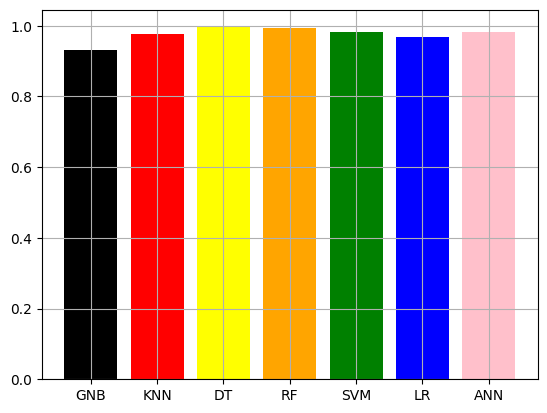

In [27]:
import matplotlib.pyplot as plt 

acc_train = [acc_train_gnb, acc_train_knn, acc_train_dt, acc_train_rf, acc_train_svm, acc_train_lr, acc_train_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]

colors = ['black', 'red', 'yellow', 'orange', 'green', 'blue', 'pink']
plt.bar(title, acc_train, color=colors)
plt.grid()
plt.show()

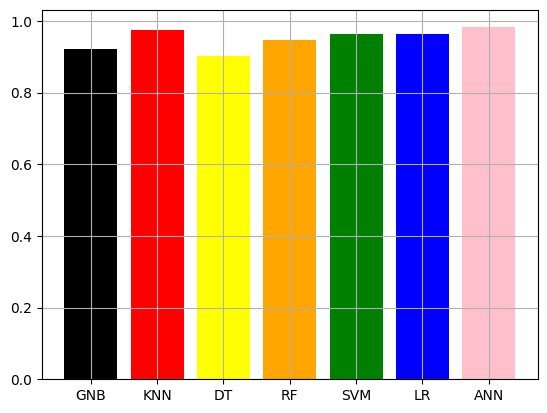

In [28]:
acc_test = [acc_test_gnb, acc_test_knn, acc_test_dt, acc_test_rf, acc_test_svm, acc_test_lr, acc_test_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]

colors = ['black', 'red', 'yellow', 'orange', 'green', 'blue', 'pink']
plt.bar(title, acc_test, color=colors)
plt.grid()
plt.show()

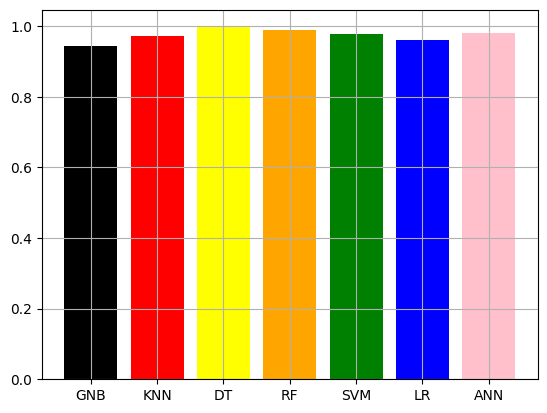

In [29]:
p = [p_gnb, p_knn, p_dt, p_rf, p_svm, p_lr, p_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]

colors = ['black', 'red', 'yellow', 'orange', 'green', 'blue', 'pink']
plt.bar(title, p, color=colors)
plt.grid()
plt.show()

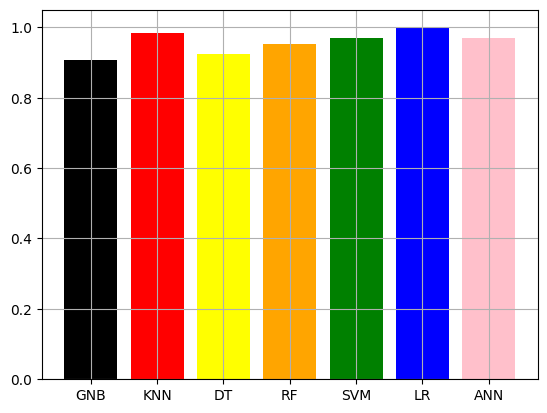

In [30]:
r = [r_gnb, r_knn, r_dt, r_rf, r_svm, r_lr, r_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]

colors = ['black', 'red', 'yellow', 'orange', 'green', 'blue', 'pink']
plt.bar(title, r, color=colors)
plt.grid()
plt.show()